In [1]:
!ls

BankChurners.csv           Credit_Card_Analysis.ipynb


In [2]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
#del(df['CLIENTNUM']) -- otra forma de borrar una columna
df.drop('CLIENTNUM',axis=1,inplace=True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)

In [6]:
df['Gender']=df['Gender'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [7]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

### Ordernar variables categóricas

In [8]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['Unknown','Uneducated','High School','College','Graduate','Post-Graduate','Doctorate'],
                           ordered = True)
df['Education_Level'] = df['Education_Level'].astype(cat_type)
cat_type1 = CategoricalDtype(categories=['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'],
                           ordered = True)
df['Income_Category'] = df['Income_Category'].astype(cat_type1)

## Categorizar información

In [9]:
df['Customer_Age'].sort_values().unique()

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73])

In [10]:
#Método usando "qcut"
group_ages = ['20-30','30-40','40-45','46-50','50-60','60-70','70-73']
df['Customer_Age_Group'] = pd.qcut(df['Customer_Age'],q=7,labels=group_ages)
df[['Customer_Age','Customer_Age_Group']]

,Customer_Age,Customer_Age_Group
0,45,40-45
1,49,50-60
2,51,50-60
3,40,30-40
4,40,30-40
...,...,...
10122,50,50-60
10123,41,30-40
10124,44,40-45
10125,30,20-30


In [11]:
#Método usando "cut"
ranges=[20,30,40,50,60,70,np.inf]
group_ages2 = ['20-30','30-40','40-50','50-60','60-70','70+']
df['Customer_Age_Group2'] = pd.cut(df['Customer_Age'],bins=ranges,labels=group_ages2)
df[['Customer_Age','Customer_Age_Group2']]

,Customer_Age,Customer_Age_Group2
0,45,40-50
1,49,40-50
2,51,50-60
3,40,30-40
4,40,30-40
...,...,...
10122,50,40-50
10123,41,40-50
10124,44,40-50
10125,30,20-30


## Exloración de los datos

In [12]:
#Checar si tenemos registros duplicados, que al parecer no se tiene ninguno 
df[df.duplicated(keep=False)]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_Group,Customer_Age_Group2


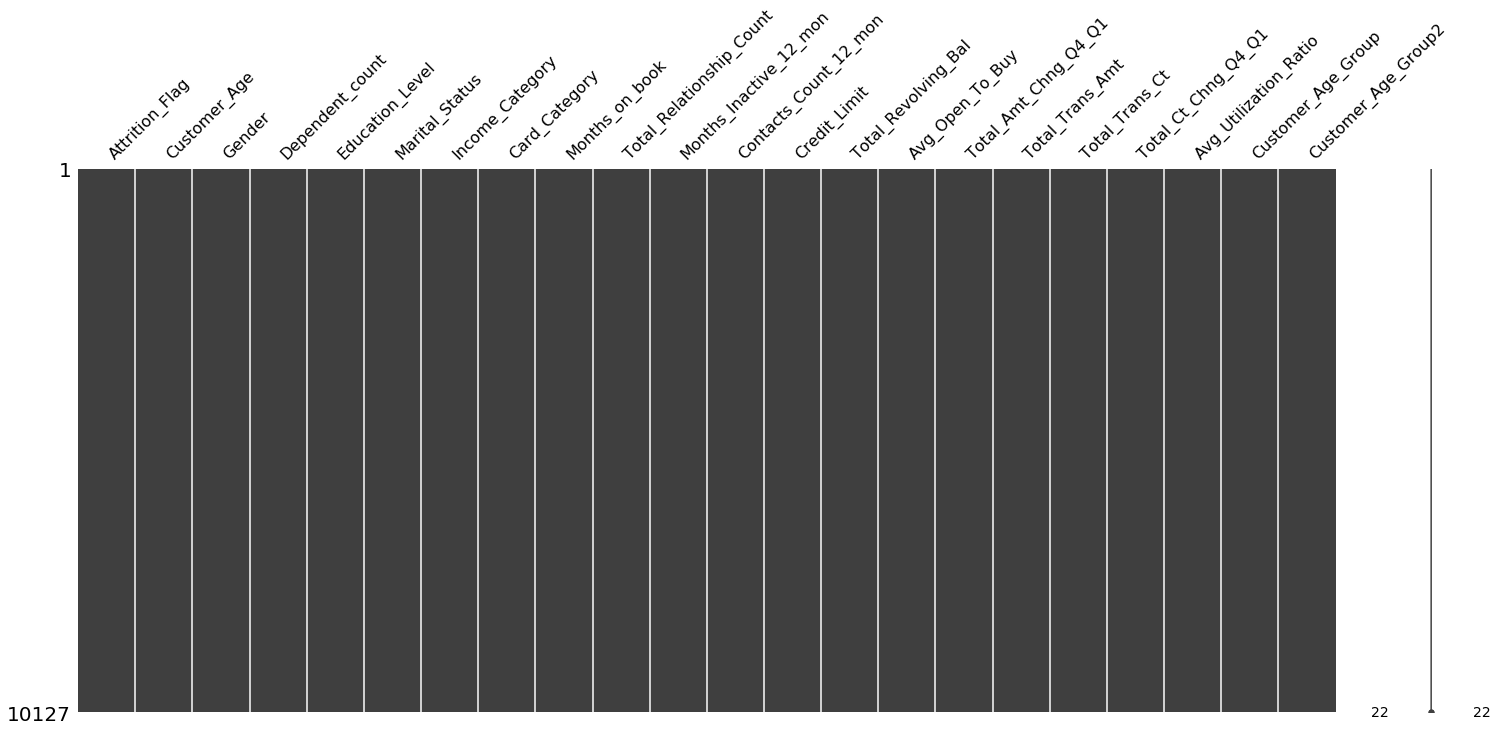

In [13]:
#Explorar dónde se encuentra información faltante
# Como todo esta coloreado significa que no hay ningún dato faltante
import missingno as msno
msno.matrix(df)

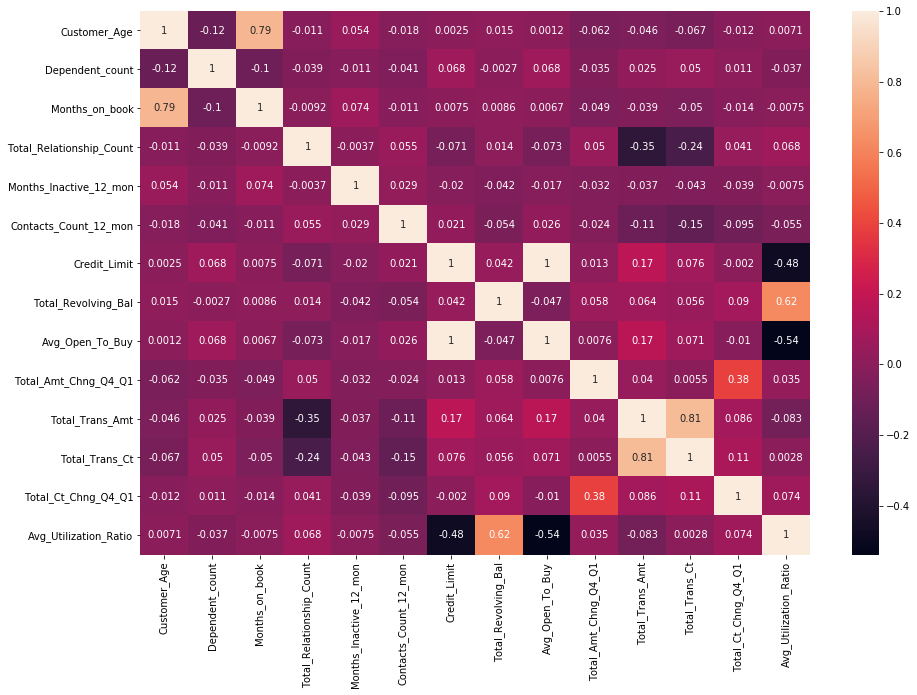

In [14]:
df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True)

In [15]:
# Las columnas con valores numericos se plotean con "hist"
# Las columnas con valores string se plotean con "bar"

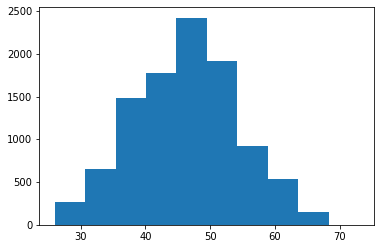

In [16]:
plt.hist(df['Customer_Age'])
#plt.plot(df['Customer_Age'])
plt.show()

([<matplotlib.patches.Wedge at 0x7fabeadf5b50>,
 [Text(0.10035590564411725, 1.0954125671190509, 'M'),
  Text(-0.10035590564411714, -1.0954125671190509, 'F')],
 [Text(0.054739584896791225, 0.5974977638831186, '47.1%'),
  Text(-0.05473958489679117, -0.5974977638831186, '52.9%')])

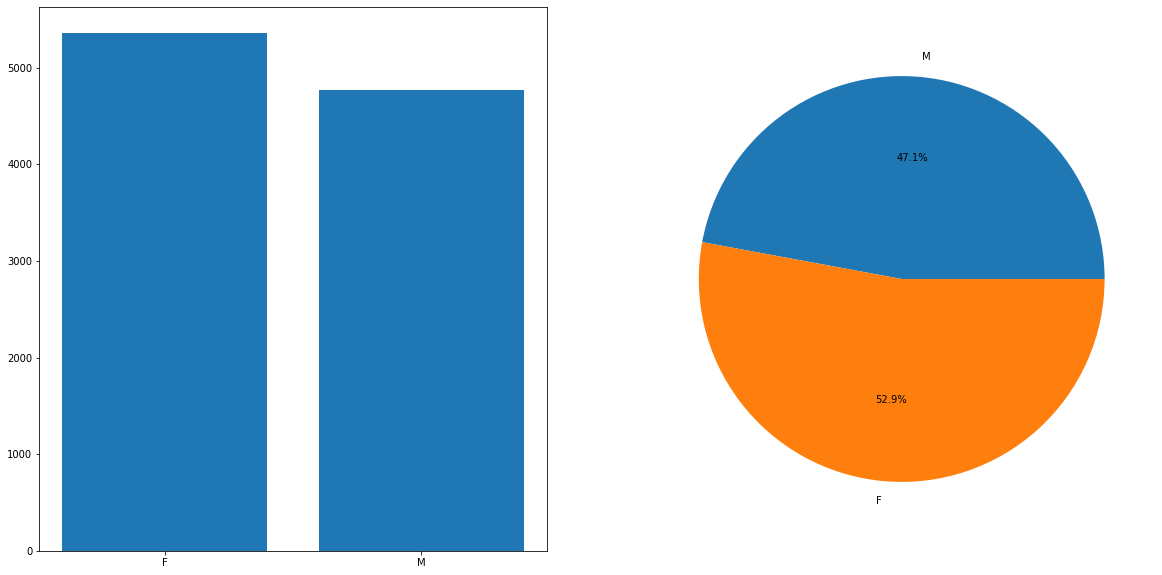

In [17]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].bar(df['Gender'].value_counts().index,df['Gender'].value_counts())
ax[1].pie(df['Gender'].value_counts().sort_values(),labels=df['Gender'].value_counts().sort_values().index,autopct='%1.1f%%')

In [18]:
pd.crosstab(df['Education_Level'],df['Gender'])

Gender,F,M
Education_Level,,
Unknown,812,707
Uneducated,796,691
High School,1028,985
College,532,481
Graduate,1670,1458
Post-Graduate,263,253
Doctorate,257,194


/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


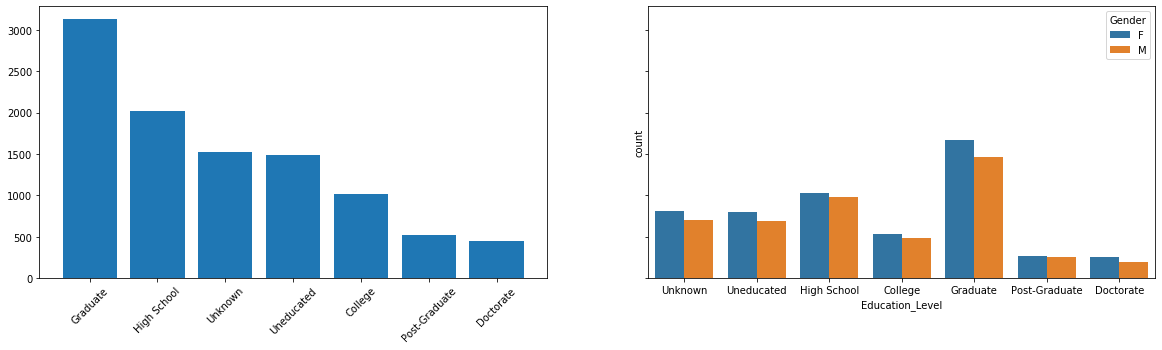

In [19]:
fig,ax=plt.subplots(1,2,figsize=(20,5),sharey=True)
ax[0].bar(df['Education_Level'].value_counts().index,df['Education_Level'].value_counts())
ax[0].set_xticklabels(df['Education_Level'].value_counts().index,rotation=45)
sns.countplot(df['Education_Level'],hue=df['Gender'],ax=ax[1])
plt.show()

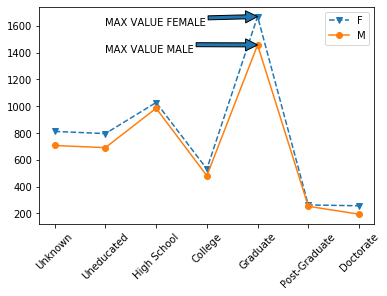

In [20]:
pd.crosstab(df['Education_Level'],df['Gender'])
fig,ax=plt.subplots()
ax.plot(pd.crosstab(df['Education_Level'],df['Gender']).index,pd.crosstab(df['Education_Level'],df['Gender'])['F'],'v',linestyle='--',label='F')
ax.plot(pd.crosstab(df['Education_Level'],df['Gender']).index,pd.crosstab(df['Education_Level'],df['Gender'])['M'],'o',linestyle='-',label='M')
ax.set_xticklabels(pd.crosstab(df['Education_Level'],df['Gender']).index,rotation=45)
ax.annotate("MAX VALUE FEMALE",xy=(4,1670),xytext=(1,1600),arrowprops={})
ax.annotate("MAX VALUE MALE",xy=(4,1458),xytext=(1,1400),arrowprops={})
ax.legend()

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


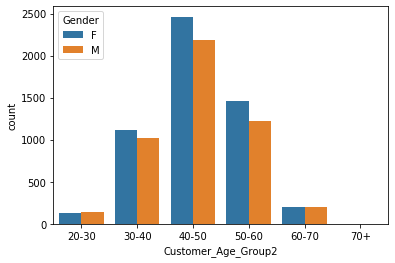

In [21]:
fig,ax=plt.subplots()
sns.countplot('Customer_Age_Group2',data=df,hue=df['Gender'])

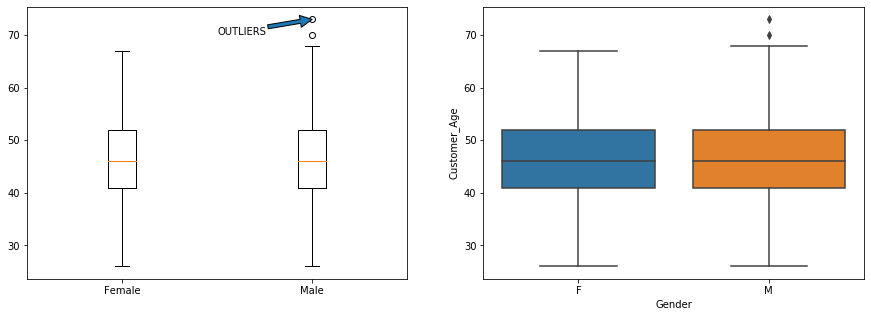

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].boxplot([df[df['Gender'].isin(['F'])]['Customer_Age'],df[df['Gender'].isin(['M'])]['Customer_Age']])
ax[0].set_xticklabels(['Female','Male'])
ax[0].annotate("OUTLIERS",xy=(2,73),xytext=(1.5,70),arrowprops={})
sns.boxplot(y='Customer_Age',x='Gender',data=df,ax=ax[1])
#Con sns se obtiene una mejor vista, pero con ax se pueden hacer anotaciones y resaltar
# información con las flechas

Text(0, 0.5, 'Credit Limit')

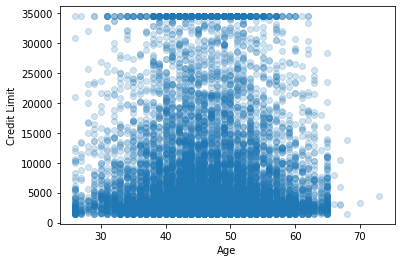

In [23]:
fig,ax =plt.subplots()
ax.scatter(df['Customer_Age'],df['Credit_Limit'],alpha=0.2)
ax.set_xlabel('Age')
ax.set_ylabel('Credit Limit')

## Supervised Analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  object  
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  object  
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [25]:
#Numerical data
Num_data1= df[['Customer_Age','Dependent_count']]
Num_data2= df.iloc[:,8:20]
Num_data3 = pd.concat([Num_data1,Num_data2],axis=1)

In [26]:
#Categorical data
Cate_Data = df[['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']]
Cate_Data2 = pd.get_dummies(Cate_Data,drop_first=True)

In [27]:
#Esta forma es más rápida para convertir todo el Dataset en dummies
col= ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
Cate_Data3=pd.get_dummies(df,columns=col).drop(['Attrition_Flag','Customer_Age_Group','Customer_Age_Group2'],axis=1)
Cate_Data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  float64
 7   Total_Revolving_Bal             10127 non-null  int64  
 8   Avg_Open_To_Buy                 10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 10  Total_Trans_Amt                 10127 non-null  int64  
 11  Total_Trans_Ct                  10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1             

In [36]:
#Target
target = pd.DataFrame(pd.get_dummies(df['Attrition_Flag'])['Attrited Customer'])
#target = pd.DataFrame(pd.get_dummies(df['Attrition_Flag']))
target

,Attrited Customer
0,0
1,0
2,0
3,0
4,0
...,...
10122,0
10123,1
10124,1
10125,1


In [29]:
#Otra forma de convertir en dummies los campos 

    #df['Attrition_Flag'].replace({'Existing Customer' : 0, 'Attrited Customer' : 1},inplace = True)
    #df['Gender'].replace({'F': 0, 'M': 1}, inplace = True)
    #df['Education_Level'].replace({'Unknown' : 0, 'Uneducated' : 1, 'High School' : 2, 'College' : 3, 
                               #'Graduate' : 4, 'Post-Graduate' : 5, 'Doctorate' : 6}, inplace = True)
    #df['Marital_Status'].replace({'Unknown' : 0, 'Single' : 1, 'Divorced' : 2, 'Married' : 3}, inplace = True)
    #df['Income_Category'].replace({'Unknown' : 0, 'Less than $40K' : 1, '$40K - $60K' : 2, '$60K - $80K' : 3,
                              #'$80K - $120K' : 4, '$120K +' : 5}, inplace = True)
    #df['Card_Category'].replace({'Blue' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3}, inplace = True)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(Cate_Data3,target,test_size=0.25,random_state=0)
param_grid = {'n_neighbors':np.arange(1,51)}

reg= LinearRegression()
reg.fit(X_train,y_train)
print('Linea Regression score:',reg.score(X_test,y_test))
cv_results = cross_val_score(reg,Cate_Data3,target,cv=5)
print('Cross Validation Linear Regression:',cv_results)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('Logistic Regression score:',logreg.score(X_test,y_test))

rid= Ridge(alpha=0.1,normalize=True)
rid.fit(X_train,y_train)
print('Ridge score:',rid.score(X_test,y_test))

lass= Lasso(alpha=0.1,normalize=True)
lass.fit(X_train,y_train)
print('Lasso score:',lass.score(X_test,y_test))

Linea Regression score: 0.3539403786196895
Cross Validation Linear Regression: [-1.23713083  0.20386229  0.48069172  0.43249438  0.08281493]


/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression score: 0.8779620853080569
Ridge score: 0.3439469164450263
Lasso score: -0.0011195293856218758


/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(Cate_Data3,target,test_size=0.25,random_state=0)
param_grid = {'n_neighbors':np.arange(1,51)}

knn= KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
print(knn_cv.best_params_)
print('Knn score:',knn_cv.score(X_test,y_test))
knn_cv.best_score_

{'n_neighbors': 11}
Knn score: 0.8886255924170616


0.8944042132982226

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(Cate_Data3,target,test_size=0.25,random_state=0)
param_grid = {'alpha':np.linspace(0,1)}

rid= Ridge(normalize=True)
rid_cv = GridSearchCV(rid,param_grid,cv=5)
rid_cv.fit(X_train,y_train)
print(rid_cv.best_params_)
rid_cv.best_score_

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (th

{'alpha': 0.0}


0.37558477463890994